2024-1학기 [알고리즘] 중간고사 대체과제

Q. 현재 위치부터 가까운 편의점 관리하기
현재 위치를 (0, 0)이라 가정하고, 편의점 위치(x, y)와 거리가 가까운 순서대로 원형 연결 리스트를 생성하는
프로그램을 다음 조건에 맞게 작성한다.

1. 편의점 10개를 A, B, C, ... 순서로 이름을 부여한다.
2. 편의점 위치 x와 y는 1부터 100까지 랜덤하게 좌표가 생성되도록 한다.
3. 현재 위치와 편의점 거리는 (x^2+y^2)의 제곱근(sqrt)으로 계산한다.
4. 편의점 데이터 1개는 (편의점이름, x좌표, y좌표) 형식의 튜플로 구성한다.

J 편의점, 거리: 40.26164427839479
A 편의점, 거리: 46.52956049652737
D 편의점, 거리: 47.53945729601885
B 편의점, 거리: 53.81449618829484
E 편의점, 거리: 55.31726674375732
G 편의점, 거리: 63.63961030678928
H 편의점, 거리: 75.07329751649384
C 편의점, 거리: 79.07591289387686
F 편의점, 거리: 84.38009243891595
I 편의점, 거리: 96.93812459502195



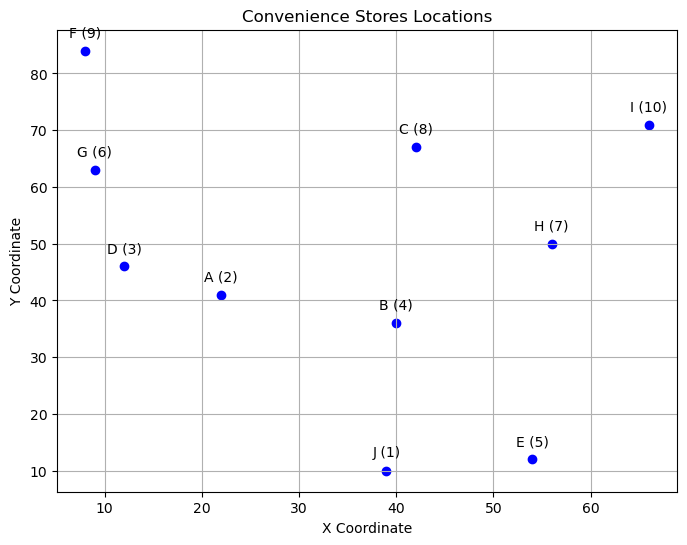

프로그램 실행 시간: 0.16522765159606934 초


In [87]:
import random
import math
import time
import matplotlib.pyplot as plt

class Node():
    def __init__(self, store):
        # 데이터의 길이가 3이 아닌 경우 ValueError를 발생시킴
        if len(store) != 3:
            raise ValueError("Store data must contain name, x-coordinate, and y-coordinate.")
        self.data = store
        self.next = None

def make_store_list(store):
    global head

    node = Node(store)

    # 헤드가 비어 있는 경우 새로운 노드를 헤드로 지정
    if head is None:
        head = node
        head.next = head
        return

    current = head

    # 새로운 노드와 헤드를 비교하여 적절한 위치에 노드를 삽입
    node_x, node_y = node.data[1:]
    node_dist = node_x * node_x + node_y * node_y
    head_x, head_y = head.data[1:]
    head_dist = head_x * head_x + head_y * head_y

    if head_dist > node_dist:
        node.next = head
        last = head
        while last.next != head:
            last = last.next
        last.next = node
        head = node
        return

    while current.next != head:
        next_node = current.next
        next_x, next_y = next_node.data[1:]
        next_dist = next_x * next_x + next_y * next_y
        if next_dist > node_dist:
            break
        current = next_node

    node.next = current.next
    current.next = node

def print_stores():
    current = head
    # 헤드가 비어 있는 경우 메시지 출력 후 종료
    if current is None:
        print("No stores available.")
        return

    # 노드들을 순회하며 출력
    while True:
        x, y = current.data[1:]
        print(current.data[0], '편의점, 거리:', math.sqrt(x * x + y * y))
        current = current.next
        if current == head:
            break
    print()

if __name__ == "__main__":

    start_time = time.time()

    head = None
    store_array = []
    store_name = 'A'

    # 랜덤하게 편의점 데이터를 생성하여 리스트에 추가
    for _ in range(10):
        store = (store_name, random.randint(1, 100), random.randint(1, 100))
        store_array.append(store)
        store_name = chr(ord(store_name) + 1)

    # 리스트에 있는 편의점 데이터를 이용하여 연결 리스트 생성
    for store in store_array:
        make_store_list(store)

    # 생성된 편의점 정보 출력
    print_stores()

    # 편의점 위치를 그래프에 표시
    x_values = [store[1] for store in store_array]
    y_values = [store[2] for store in store_array]
    store_names = [store[0] for store in store_array]

    distances = [x ** 2 + y ** 2 for x, y in zip(x_values, y_values)]
    sorted_indexes = sorted(range(len(distances)), key=lambda k: distances[k])

    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, color='blue', marker='o')
    for i, idx in enumerate(sorted_indexes):
        store_idx = i + 1
        plt.annotate(f'{store_names[idx]} ({store_idx})', (x_values[idx], y_values[idx]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title('Convenience Stores Locations')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

    end_time = time.time()
    execution_time = end_time - start_time
    print("프로그램 실행 시간:", execution_time, "초")
